<a href="https://colab.research.google.com/github/vaibhavbawiskar-byt/DSBDA/blob/main/DSDBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
0,69,79,72,81,30/08/2019,2
1,76,83,71,90,23/04/2020,4
2,63,88,64,82,02/10/2019,2
3,63,92,79,97,05/03/2018,6
4,63,85,61,98,28/01/2020,4


In [60]:
df.isnull().sum()

,0
Math_Score,0
Reading_Score,0
Writing_Score,0
Placement_Score,0
Club_Join_Date,0
Placement_Offer_Count,0


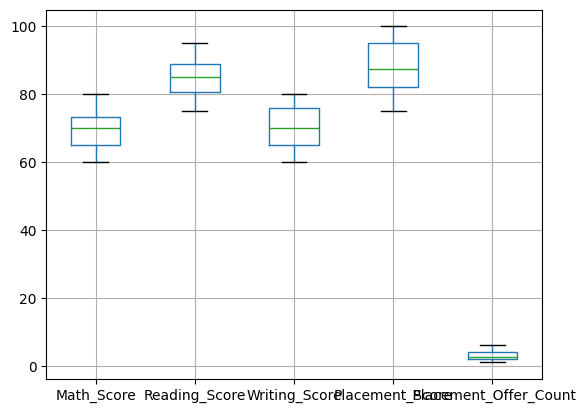

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

numeric_cols = ['Math_Score','Reading_Score','Writing_Score',
                'Placement_Score',' Placement_Offer_Count']

df.boxplot(column=numeric_cols)
plt.show()

In [62]:
missing_values = ["Na", "na"]
df = pd.read_csv("/content/StudentsPerformance.csv", na_values =
missing_values)

df

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
0,69,79,72,81,30/08/2019,2
1,76,83,71,90,23/04/2020,4
2,63,88,64,82,02/10/2019,2
3,63,92,79,97,05/03/2018,6
4,63,85,61,98,28/01/2020,4
...,...,...,...,...,...,...
75,68,82,74,100,13/08/2019,6
76,72,81,77,93,22/04/2019,4
77,66,83,80,98,14/03/2019,5
78,63,86,80,84,02/03/2019,1


In [63]:
print(np.where(df['Math_Score']>90))
print(np.where(df['Reading_Score']<25))
print(np.where(df['Writing_Score']<30))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [69]:
numeric_cols_for_outliers = ['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score', ' Placement_Offer_Count']

all_outliers = pd.DataFrame()

for column in numeric_cols_for_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_col = df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()

    if not outliers_col.empty:
        outliers_col['Outlier_Column'] = column
        all_outliers = pd.concat([all_outliers, outliers_col], ignore_index=True)

print("Identified Outliers:")
print(all_outliers)

Identified Outliers:
Empty DataFrame
Columns: []
Index: []


In [65]:
placement_score_column = 'Placement_Score'

df['Placement_Performance_Level'] = pd.qcut(df[placement_score_column],
                                              q=3,
                                              labels=['Low', 'Medium', 'High'])

print("Value counts for Placement_Performance_Level:")
print(df['Placement_Performance_Level'].value_counts())

Value counts for Placement_Performance_Level:
Placement_Performance_Level
Low       29
High      27
Medium    24
Name: count, dtype: int64


Descriptive Statistics Grouped by Placement Performance Level:
                            Math_Score                                         \
                                 count       mean       std   min   25%   50%   
Placement_Performance_Level                                                     
Low                               29.0  69.275862  5.489578  60.0  64.0  69.0   
Medium                            24.0  70.875000  5.227956  60.0  67.0  71.0   
High                              27.0  69.185185  5.335203  61.0  65.0  68.0   

                                        Reading_Score             ...  \
                              75%   max         count       mean  ...   
Placement_Performance_Level                                       ...   
Low                          73.0  80.0          29.0  86.103448  ...   
Medium                       76.0  79.0          24.0  84.333333  ...   
High                         73.5  79.0          27.0  83.111111  ...   

           

/tmp/ipython-input-2094774716.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats_grouped = df.groupby('Placement_Performance_Level')[numeric_cols_for_stats].describe()
/tmp/ipython-input-2094774716.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Placement_Performance_Level')[col].mean().plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'])
/tmp/ipython-input-2094774716.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

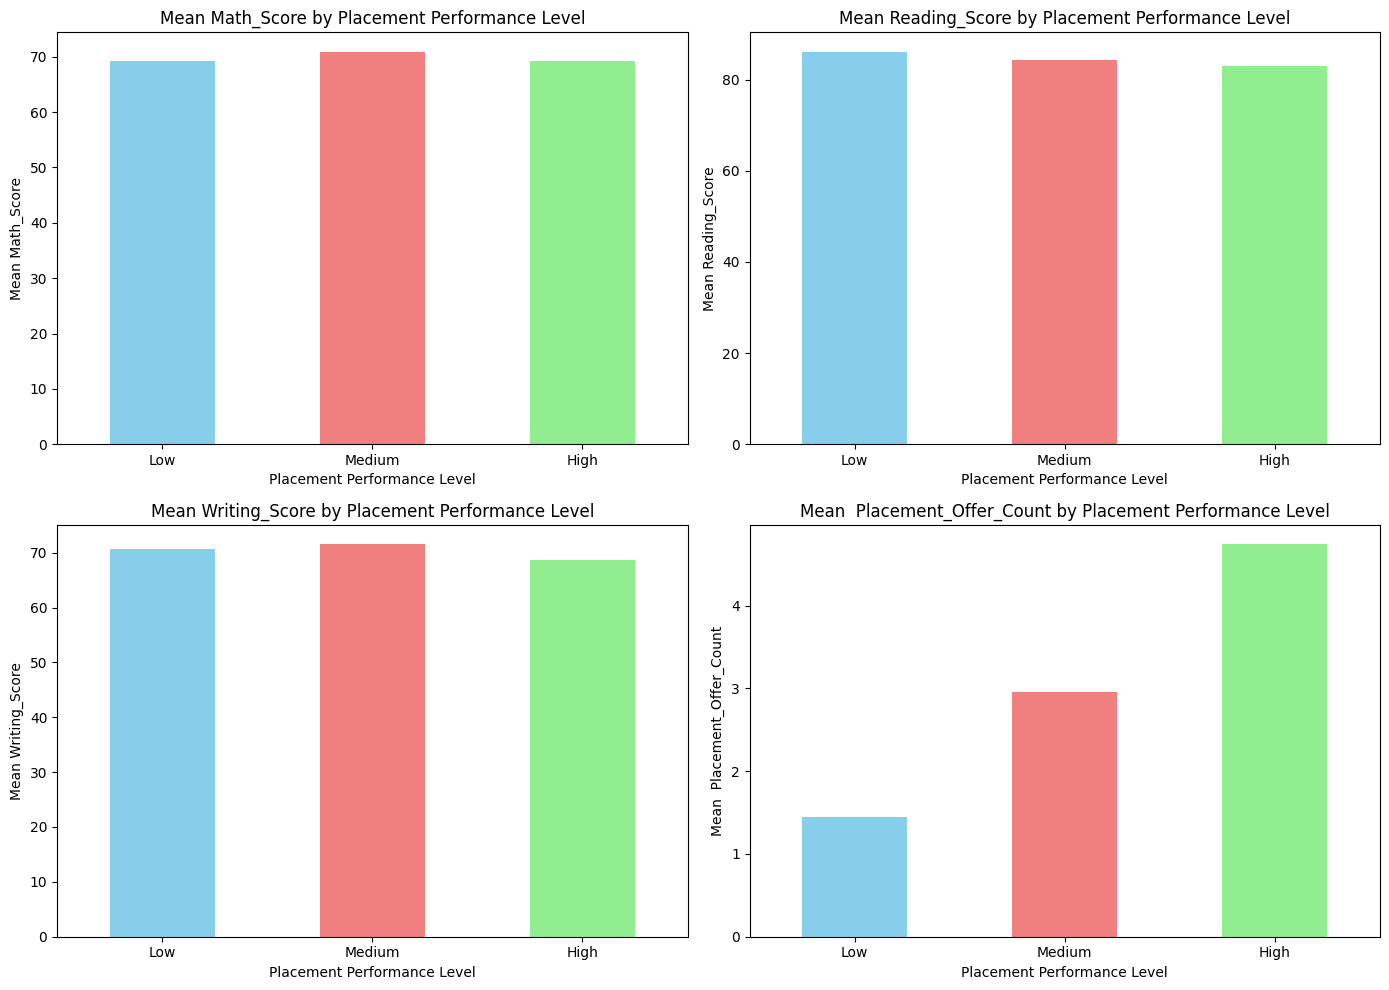

In [66]:
import matplotlib.pyplot as plt

numeric_cols_for_stats = ['Math_Score', 'Reading_Score', 'Writing_Score', ' Placement_Offer_Count']

# Calculate descriptive statistics grouped by 'Placement_Performance_Level'
descriptive_stats_grouped = df.groupby('Placement_Performance_Level')[numeric_cols_for_stats].describe()
print("Descriptive Statistics Grouped by Placement Performance Level:")
print(descriptive_stats_grouped)

# Visualize the mean of each numeric column across performance levels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_stats):
    df.groupby('Placement_Performance_Level')[col].mean().plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'Mean {col} by Placement Performance Level')
    axes[i].set_xlabel('Placement Performance Level')
    axes[i].set_ylabel(f'Mean {col}')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Descriptive Statistics Grouped by Placement Performance Level:
                            Math_Score                                         \
                                 count       mean       std   min   25%   50%   
Placement_Performance_Level                                                     
Low                               29.0  69.275862  5.489578  60.0  64.0  69.0   
Medium                            24.0  70.875000  5.227956  60.0  67.0  71.0   
High                              27.0  69.185185  5.335203  61.0  65.0  68.0   

                                        Reading_Score             ...  \
                              75%   max         count       mean  ...   
Placement_Performance_Level                                       ...   
Low                          73.0  80.0          29.0  86.103448  ...   
Medium                       76.0  79.0          24.0  84.333333  ...   
High                         73.5  79.0          27.0  83.111111  ...   

           

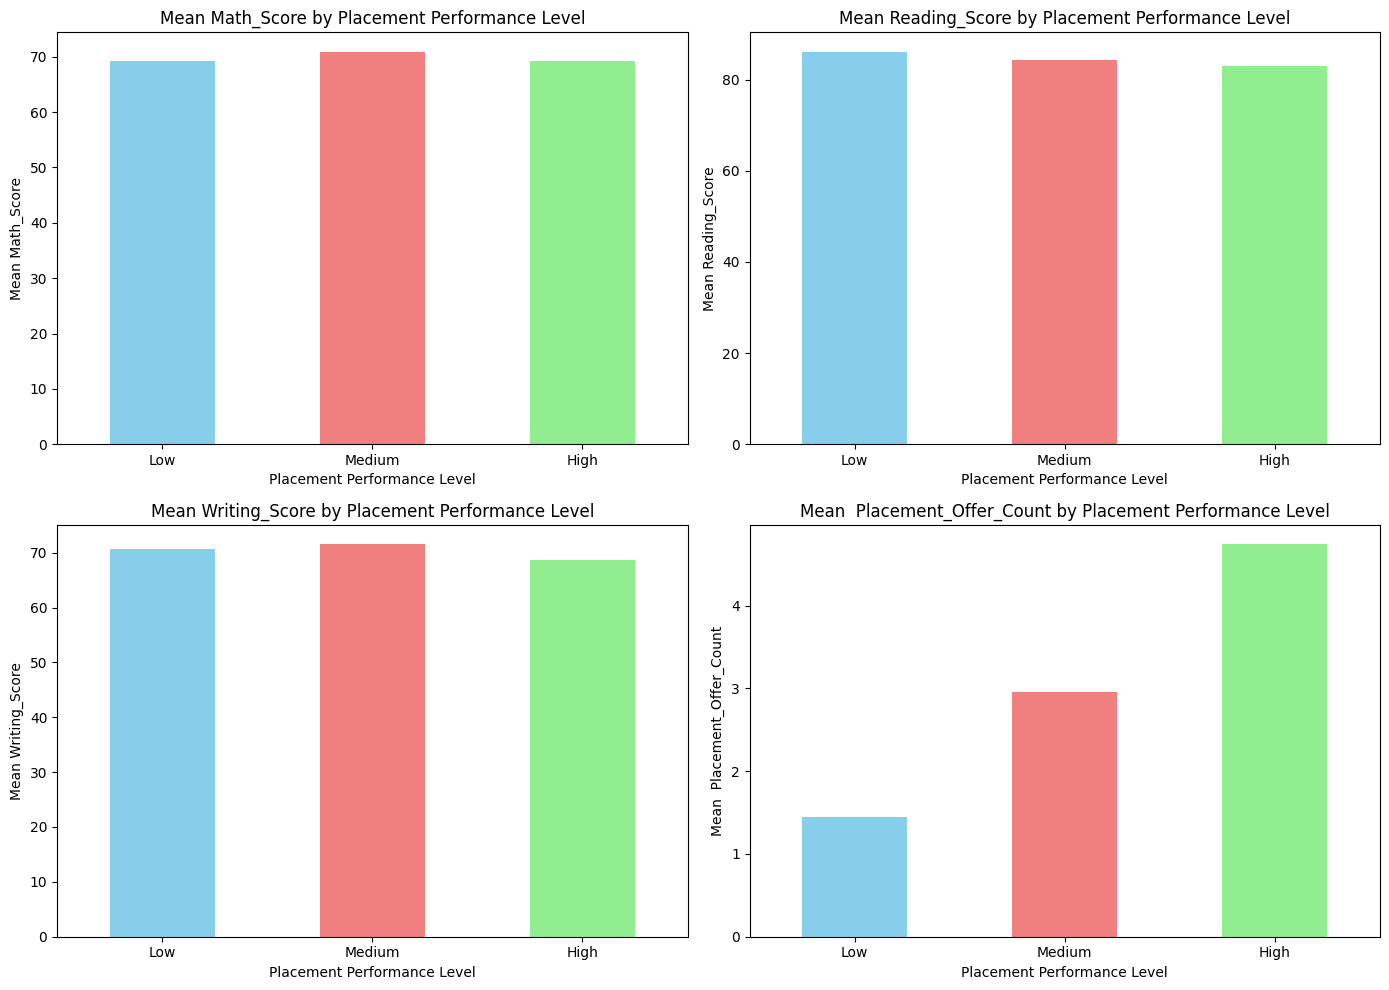

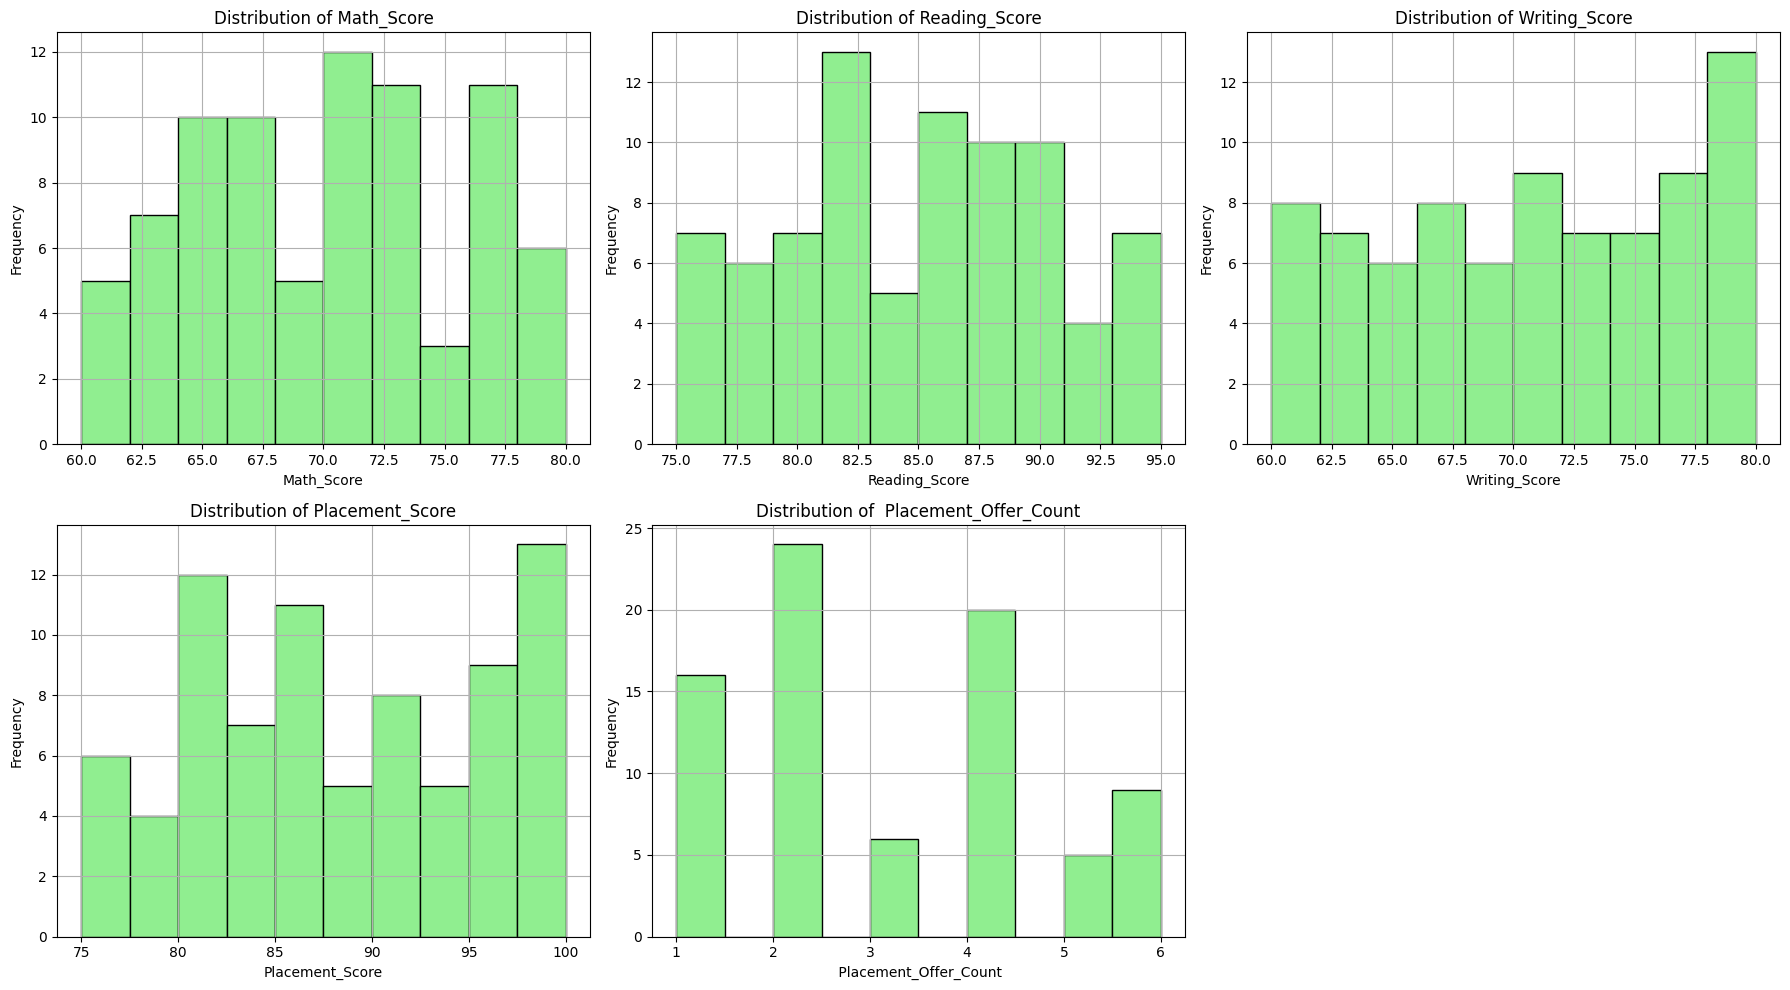

In [67]:
import matplotlib.pyplot as plt

numeric_cols_for_stats = ['Math_Score', 'Reading_Score', 'Writing_Score', ' Placement_Offer_Count']

# Calculate descriptive statistics grouped by 'Placement_Performance_Level'
descriptive_stats_grouped = df.groupby('Placement_Performance_Level', observed=False)[numeric_cols_for_stats].describe()
print("Descriptive Statistics Grouped by Placement Performance Level:")
print(descriptive_stats_grouped)

# Visualize the mean of each numeric column across performance levels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_stats):
    df.groupby('Placement_Performance_Level', observed=False)[col].mean().plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'Mean {col} by Placement Performance Level')
    axes[i].set_xlabel('Placement Performance Level')
    axes[i].set_ylabel(f'Mean {col}')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


# Define the key numeric score columns for histograms
key_numeric_score_cols = ['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score', ' Placement_Offer_Count']

# Create histograms for the key numeric score columns
fig_hist, axes_hist = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes_hist = axes_hist.flatten()

for i, col in enumerate(key_numeric_score_cols):
    if i < len(axes_hist): # Ensure we don't try to plot beyond the available subplots
        df[col].hist(ax=axes_hist[i], bins=10, edgecolor='black', color='lightgreen')
        axes_hist[i].set_title(f'Distribution of {col}')
        axes_hist[i].set_xlabel(col)
        axes_hist[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes_hist)):
    fig_hist.delaxes(axes_hist[j])

plt.tight_layout()
plt.show()